In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [97]:
# Import the data
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Convert the Gender column to numeric type
data["Gender"] = data["Gender"].replace({"Female": 1, "Male": 0})

# Preprocess the features by scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']])


/tmp/ipykernel_36/2998814027.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace({"Female": 1, "Male": 0})


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

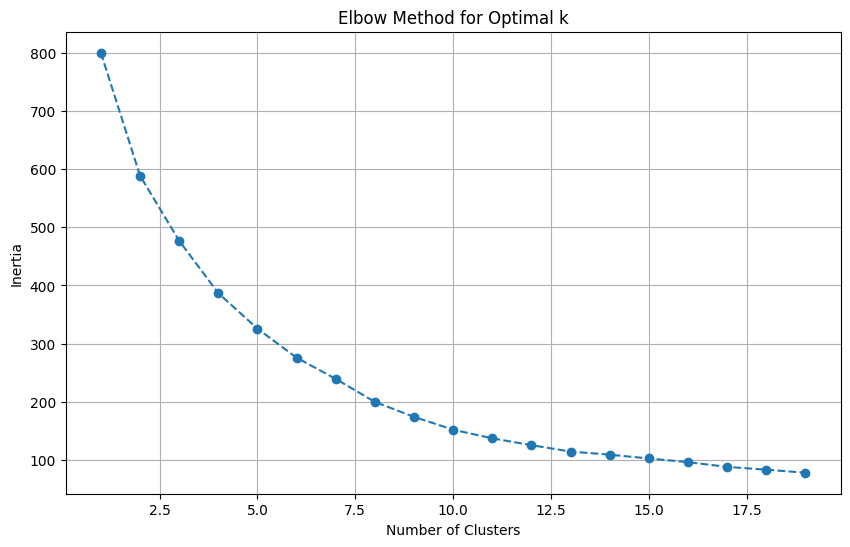

Optimal number of clusters: 7


In [98]:
# Choose the best num of clusters 
inertia = []
for k in range (1 , 20) :
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    inertia.append(model.inertia_)
    
# Plot the results
plt.figure(figsize=(10, 6)) # specify the size in inche
plt.plot(range(1, 20), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia') 
plt.grid(True)
plt.show()

# Find the elbow point programmatically 
# Calculate the difference in inertia
inertia_diff = np.diff(inertia)
inertia_diff2 = np.diff(inertia_diff)

# Locate the index of the maximum change
optimal_k = np.argmin(inertia_diff2) + 2
print(f'Optimal number of clusters: {optimal_k}')

In [99]:
model = KMeans(n_clusters = 12 )
model.fit(scaled_features)
data["cluster"] = model.predict(scaled_features)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [100]:
# Analyze the results
stat_clusters = data.groupby("cluster").mean()
print (stat_clusters)

         CustomerID  Gender        Age  Annual Income (k$)  \
cluster                                                      
0        163.333333     1.0  32.190476           86.047619   
1        157.000000     0.0  48.636364           82.272727   
2         23.461538     1.0  41.538462           26.538462   
3        160.444444     0.0  33.277778           87.111111   
4        171.714286     1.0  43.785714           93.285714   
5         83.923077     1.0  54.153846           54.230769   
6         55.130435     0.0  24.608696           40.695652   
7         22.769231     1.0  25.461538           25.692308   
8        162.555556     0.0  28.333333           88.666667   
9         81.380952     0.0  57.857143           53.571429   
10        19.666667     0.0  55.500000           24.000000   
11        92.400000     1.0  27.960000           57.360000   

         Spending Score (1-100)  
cluster                          
0                     81.666667  
1                     19.1818